In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train[0].shape

(28, 28)

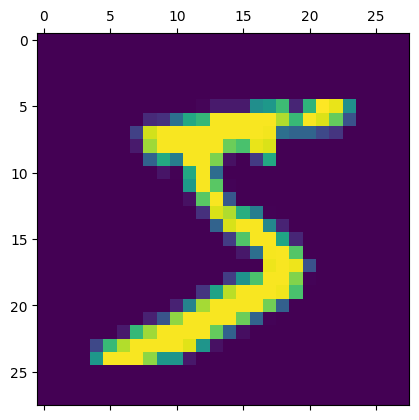

In [ ]:
plt.matshow(x_train[0])

In [ ]:
y_train[0]

5

Neural Network with hidden layer

In [ ]:
l1= keras.layers.Flatten(input_shape=(28,28))
l2= keras.layers.Dense(units=120, activation = 'relu')
l3= keras.layers.Dense(10,activation = 'softmax')

In [ ]:
model= keras.Sequential([l1,l2,l3])

In [ ]:
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 120)               94200     
                                                                 
 dense_6 (Dense)             (None, 10)                1210      
                                                                 
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 2.5713 - accuracy: 0.8566
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3686 - accuracy: 0.9130
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2967 - accuracy: 0.9272
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2482 - accuracy: 0.9362
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2354 - accuracy: 0.9422
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2087 - accuracy: 0.9471
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2036 - accuracy: 0.9505
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1873 - accuracy: 0.9536
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1820 - accuracy: 0.9554
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.18

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3401 - accuracy: 0.9532


[0.34008392691612244, 0.9531999826431274]

In [ ]:
y_pred = model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred[8]

array([1.0482920e-21, 9.3185880e-28, 6.6689180e-37, 7.1596393e-24,
       0.0000000e+00, 9.5713437e-01, 4.2865645e-02, 0.0000000e+00,
       3.9536434e-12, 3.3177493e-17], dtype=float32)

In [ ]:
np.argmax(y_pred[6])

4

In [ ]:
y_test[6]

4

In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

Text(95.72222222222221, 0.5, 'truth')

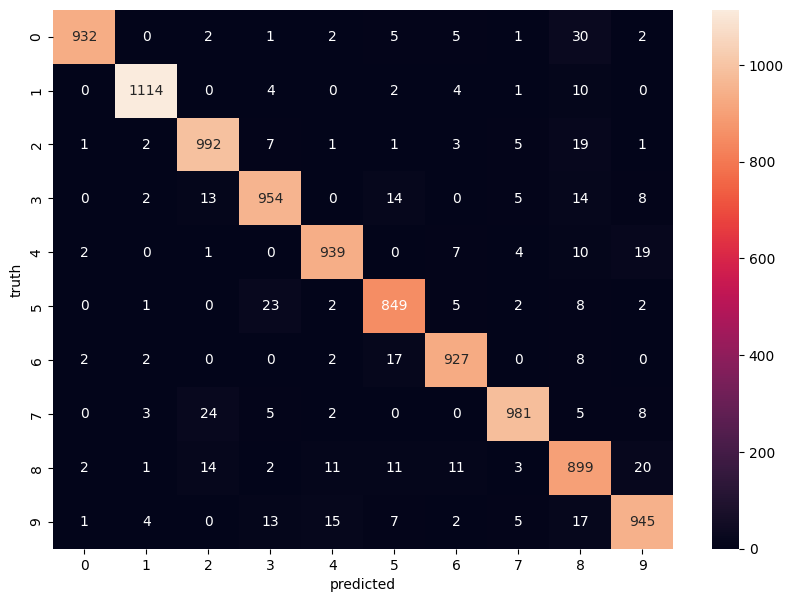

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("truth")

Neural Network without hidden layer

In [ ]:
l1= keras.layers.Flatten(input_shape=(28,28,1))
l2= keras.layers.Dense(10,activation = 'softmax')

In [ ]:
model= keras.Sequential([l1,l2])

In [ ]:
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 9.2529 - accuracy: 0.8423
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1165 - accuracy: 0.8777
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6464 - accuracy: 0.8825
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5368 - accuracy: 0.8862
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3695 - accuracy: 0.8884
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3890 - accuracy: 0.8873
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2130 - accuracy: 0.8882
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2896 - accuracy: 0.8898
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 5.2899 - accuracy: 0.8888
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 5.107

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.7503 - accuracy: 0.8962


[5.750313758850098, 0.8962000012397766]

In [ ]:
y_pred = model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

Text(95.72222222222221, 0.5, 'truth')

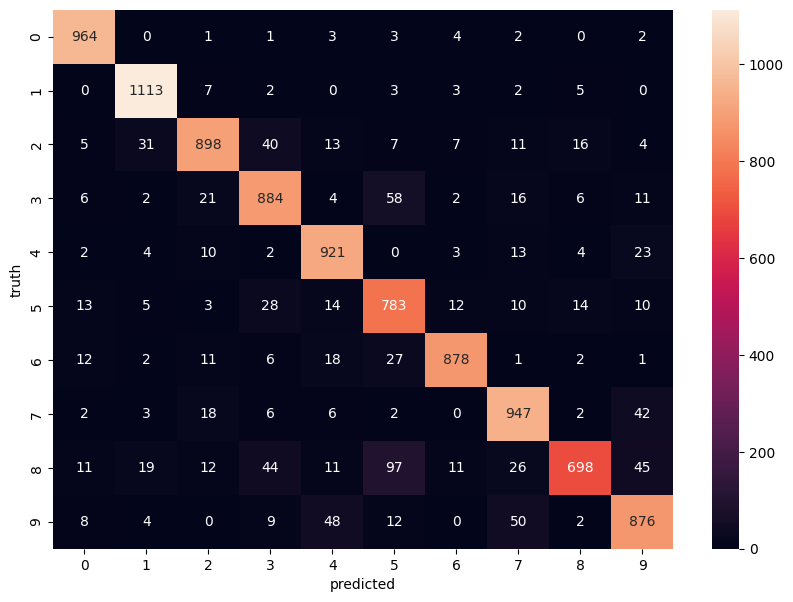

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("truth")